In [43]:
import pandas as pd
import os
import matplotlib.pyplot as plt

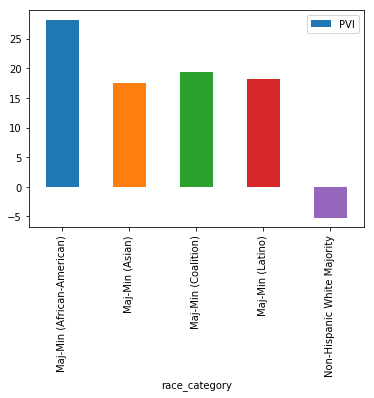

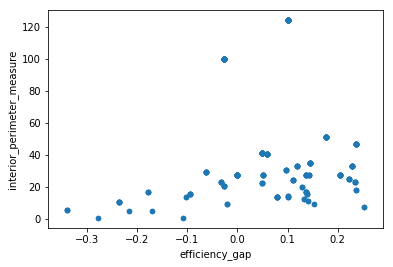

In [71]:
districts = pd.read_csv('redistricting-atlas-data/districts.csv')
states = pd.read_csv('redistricting-atlas-data/states.csv')
state_area = pd.read_csv('data/wiki_state_area.csv')

states_analysis = states[(states['maptype'] == "current") & (states['districts'] > 1)]
states_merged = pd.merge(states_analysis, state_area, how='inner', left_on='state', right_on='state abbrev')
states_merged['sq mi'] = states_merged['sq mi'].str.replace(',','')
states_merged['sq mi'] = pd.to_numeric(states_merged['sq mi'])
states_merged['perimeter_by_area'] = (states_merged['interior_perimeter_measure'] / states_merged['sq mi'])
states_merged.sort_values('interior_perimeter_measure',ascending=False)

districts_current = districts[(districts['maptype'] == 'current') & (districts['district'] > 0)]

allmaps = pd.merge(states_merged, districts_current, on=['statefp', 'state','maptype'], how='inner')

allmaps_racegroup = allmaps.groupby('race_category').mean().reset_index()
allmaps_racegroup.plot(kind='bar',x='race_category',y='PVI')
# allmaps_compactrank = allmaps.groupby('compactness_rank').mean().reset_index()
# allmaps_compactrank.plot(kind='bar',x='compactness_rank',y='PVI')
allmaps.plot(kind='scatter',x='efficiency_gap',y='interior_perimeter_measure')
# allmaps.plot(kind='scatter',x='minority_chance',y="PVI")
allmaps['relative_perimeter'] = allmaps['interior_perimeter_measure'] / allmaps['districts']
# allmaps_compactrank.plot(kind='bar',x='compactness_rank',y='perimeter_by_area',figsize=(12,5))
allmaps = allmaps.reset_index()
allmaps_extraseats = allmaps.groupby('efficiency_gap_extra_seats')
allmaps_extraseats.describe().reset_index()
dem_districts = allmaps[allmaps['efficiency_gap'] < 0]
gop_districts = allmaps[allmaps['efficiency_gap'] > 0]
gop_districts_race = gop_districts.groupby('race_category').mean().reset_index()
dem_districts_race = dem_districts.groupby('race_category').mean().reset_index()
dem_avg_compact = dem_districts['compactness_rank'].mean()
gop_avg_compact = gop_districts['compactness_rank'].mean()
dem_avg_perimeter = dem_districts['perimeter_by_area'].mean()
gop_avg_perimeter = gop_districts['perimeter_by_area'].mean()
dem_avg_sqmi = dem_districts['sq mi'].mean()
gop_avg_sqmi = gop_districts['sq mi'].mean()
dem_num_districts = dem_districts['index'].count()
gop_num_districts = gop_districts['index'].count()
dem_pop = dem_districts['population_18_over'].sum()
gop_pop = gop_districts['population_18_over'].sum()
dem_skew = dem_districts['efficiency_gap'].abs().mean()
gop_skew = gop_districts['efficiency_gap'].abs().mean()

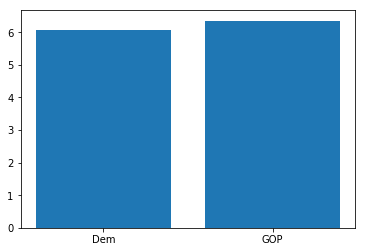

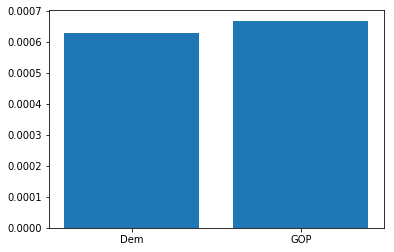

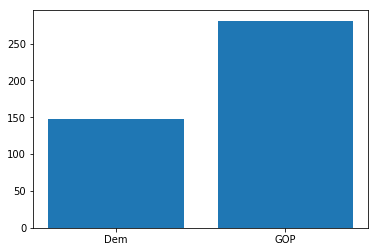

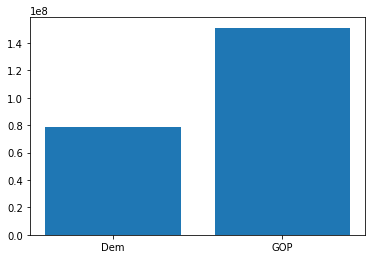

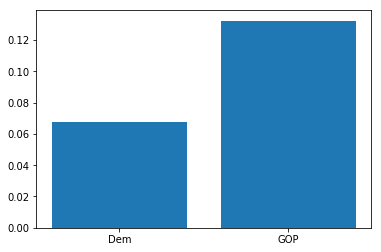

In [73]:
plt.bar(['Dem','GOP'],[dem_avg_compact, gop_avg_compact])
plt.show()
plt.bar(['Dem','GOP'],[dem_avg_perimeter, gop_avg_perimeter])
plt.show()
# plt.bar(['Dem','GOP'],[dem_avg_sqmi, gop_avg_sqmi])
# plt.show()
plt.bar(['Dem','GOP'],[dem_num_districts, gop_num_districts])
plt.show()
plt.bar(['Dem','GOP'],[dem_pop, gop_pop])
plt.show()
plt.bar(['Dem','GOP'],[dem_skew, gop_skew])
plt.show()

In [78]:
path = 'Gerrymandering-ML-and-Vis/census-states/'
csvs = [f for f in os.listdir(path) if f.endswith('.csv')]

# for csv in csvs:
#     file = pd.read_csv(path + csv)
file = pd.read_csv(path + csvs[10])
file_t = file.transpose()
# file_t['State'] = csvs[10].split("_District_")[0]
file

,Topic,Subject,Title,District 01 Estimate,District 01 MOE,District 02 Estimate,District 02 MOE,District 03 Estimate,District 03 MOE,District 04 Estimate,District 04 MOE,District 05 Estimate,District 05 MOE,District 06 Estimate,District 06 MOE,District 07 Estimate,District 07 MOE
0,People,Sex and Age,Total population,782340,(+/- 7561 ),713488,(+/- 10939 ),687378,(+/- 5850 ),731886,(+/- 6841 ),718465,(+/- 5329 ),670725,(+/- 14486 ),720087,(+/- 2593 )
1,People,Sex and Age,Male,376452,(+/- 5484 ),346788,(+/- 6127 ),339042,(+/- 3676 ),353921,(+/- 3735 ),348126,(+/- 3838 ),325529,(+/- 9144 ),347044,(+/- 3177 )
2,People,Sex and Age,Female,405888,(+/- 5021 ),366700,(+/- 6751 ),348336,(+/- 3793 ),377965,(+/- 3849 ),370339,(+/- 3396 ),345196,(+/- 8727 ),373043,(+/- 3274 )
3,People,Sex and Age,Under 5 years,46546,(+/- 2075 ),41440,(+/- 1713 ),36025,(+/- 1687 ),45288,(+/- 1478 ),42786,(+/- 1896 ),38791,(+/- 2834 ),38663,(+/- 1216 )
4,People,Sex and Age,5 to 9 years,47281,(+/- 3346 ),44478,(+/- 3266 ),44459,(+/- 3460 ),45078,(+/- 2673 ),44070,(+/- 2932 ),40329,(+/- 3274 ),41977,(+/- 3138 )
5,People,Sex and Age,10 to 14 years,47478,(+/- 3135 ),49947,(+/- 2632 ),40893,(+/- 2383 ),48368,(+/- 3072 ),50216,(+/- 2925 ),37039,(+/- 3639 ),43119,(+/- 3219 )
6,People,Sex and Age,15 to 19 years,47412,(+/- 3256 ),50715,(+/- 3174 ),48328,(+/- 2300 ),48129,(+/- 1563 ),48457,(+/- 2775 ),49253,(+/- 3858 ),44510,(+/- 2299 )
7,People,Sex and Age,20 to 24 years,42153,(+/- 3668 ),41386,(+/- 2544 ),47954,(+/- 2650 ),48005,(+/- 1637 ),42564,(+/- 2397 ),66600,(+/- 4290 ),40781,(+/- 2224 )
8,People,Sex and Age,25 to 34 years,112019,(+/- 3414 ),93453,(+/- 3925 ),79197,(+/- 2976 ),100041,(+/- 2366 ),86737,(+/- 3026 ),93264,(+/- 5326 ),83768,(+/- 2933 )
9,People,Sex and Age,35 to 44 years,100315,(+/- 2977 ),89551,(+/- 3023 ),81303,(+/- 3120 ),93134,(+/- 2254 ),91018,(+/- 2715 ),79870,(+/- 4302 ),84572,(+/- 2814 )
